In [1]:
import pandas as pd
from prophet import Prophet
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_test=pd.read_csv("DailyDelhiClimateTest.csv")
df_train=pd.read_csv("DailyDelhiClimateTrain.csv")
df=df_train
df_train

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [3]:
df_test

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333
...,...,...,...,...,...
109,2017-04-20,34.500000,27.500000,5.562500,998.625000
110,2017-04-21,34.250000,39.375000,6.962500,999.875000
111,2017-04-22,32.900000,40.900000,8.890000,1001.600000
112,2017-04-23,32.875000,27.500000,9.962500,1002.125000


# Multi-Variate Forecasting

In [4]:
df_train = df_train.rename(columns={'meantemp': 'y', 'date':'ds'})
df_train['y_orig'] = df_train['y'] # to save a copy of the original data..you'll see why shortly. 
df_train['y'] = np.log(df_train['y'])


In [5]:
df_train = df_train.rename(columns={'meantemp': 'y', 'date':'ds'})
df_train['y_orig'] = df_train['y'] # to save a copy of the original data..you'll see why shortly. 
df_train['y'] = np.log(df_train['y'])

model_new = Prophet() #instantiate Prophet
model_new.add_regressor('humidity')
model_new.add_regressor('wind_speed')
model_new.add_regressor('meanpressure')

In [6]:
model_new.fit(df_train)

''' 'year': 'A',
        'quarter': 'Q',
        'month': 'M',
        'day': 'D',
        'hour': 'H',
        'minute': 'T',
        'second': 'S',
        'millisecond': 'L',
        'microsecond': 'U',
        'nanosecond': 'N'}
'''

#future_data = model.make_future_dataframe(periods=6, freq = 'H')
future_data = model_new.make_future_dataframe(periods=113, freq = 'D')

22:46:39 - cmdstanpy - INFO - Chain [1] start processing
22:46:39 - cmdstanpy - INFO - Chain [1] done processing


In [7]:
future_data.head(5)

,ds
0,2013-01-01
1,2013-01-02
2,2013-01-03
3,2013-01-04
4,2013-01-05


In [8]:
df = pd.concat([df, df_test], ignore_index=True)
df = df.rename(columns={'meantemp': 'y', 'date':'ds'})
future_data=df[['ds', 'humidity', 'wind_speed', 'meanpressure']]

In [9]:
future_data.head(5)

,ds,humidity,wind_speed,meanpressure
0,2013-01-01,84.500000,0.000000,1015.666667
1,2013-01-02,92.000000,2.980000,1017.800000
2,2013-01-03,87.000000,4.633333,1018.666667
3,2013-01-04,71.333333,1.233333,1017.166667
4,2013-01-05,86.833333,3.700000,1016.500000


In [10]:
forecast_data = model_new.predict(future_data)

forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
1571,2017-04-20,1.280095,1.241511,1.322499
1572,2017-04-21,1.264114,1.221451,1.307066
1573,2017-04-22,1.262394,1.218606,1.302651
1574,2017-04-23,1.280699,1.240981,1.320881
1575,2017-04-24,1.284759,1.242368,1.326067


In [11]:
forecast_data

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,extra_regressors_additive,...,wind_speed,wind_speed_lower,wind_speed_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,1.086350,0.806027,0.885978,1.086350,1.086350,-0.237820,-0.237820,-0.237820,-0.032310,...,0.002612,0.002612,0.002612,-0.206674,-0.206674,-0.206674,0.0,0.0,0.0,0.848530
1,2013-01-02,1.086975,0.801555,0.878782,1.086975,1.086975,-0.248767,-0.248767,-0.248767,-0.044494,...,0.001468,0.001468,0.001468,-0.205619,-0.205619,-0.205619,0.0,0.0,0.0,0.838208
2,2013-01-03,1.087599,0.808335,0.886175,1.087599,1.087599,-0.242173,-0.242173,-0.242173,-0.037775,...,0.000833,0.000833,0.000833,-0.204049,-0.204049,-0.204049,0.0,0.0,0.0,0.845426
3,2013-01-04,1.088224,0.834222,0.912559,1.088224,1.088224,-0.215193,-0.215193,-0.215193,-0.013416,...,0.002138,0.002138,0.002138,-0.202015,-0.202015,-0.202015,0.0,0.0,0.0,0.873031
4,2013-01-05,1.088849,0.810126,0.894254,1.088849,1.088849,-0.236750,-0.236750,-0.236750,-0.037165,...,0.001191,0.001191,0.001191,-0.199575,-0.199575,-0.199575,0.0,0.0,0.0,0.852099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1571,2017-04-20,1.194403,1.241511,1.322499,1.187864,1.201398,0.085692,0.085692,0.085692,0.049459,...,0.000476,0.000476,0.000476,0.036583,0.036583,0.036583,0.0,0.0,0.0,1.280095
1572,2017-04-21,1.194470,1.221451,1.307066,1.187837,1.201479,0.069644,0.069644,0.069644,0.031447,...,-0.000062,-0.000062,-0.000062,0.037958,0.037958,0.037958,0.0,0.0,0.0,1.264114
1573,2017-04-22,1.194538,1.218606,1.302651,1.187756,1.201594,0.067856,0.067856,0.067856,0.028459,...,-0.000802,-0.000802,-0.000802,0.039407,0.039407,0.039407,0.0,0.0,0.0,1.262394
1574,2017-04-23,1.194605,1.240981,1.320881,1.187719,1.201799,0.086094,0.086094,0.086094,0.047760,...,-0.001213,-0.001213,-0.001213,0.040914,0.040914,0.040914,0.0,0.0,0.0,1.280699


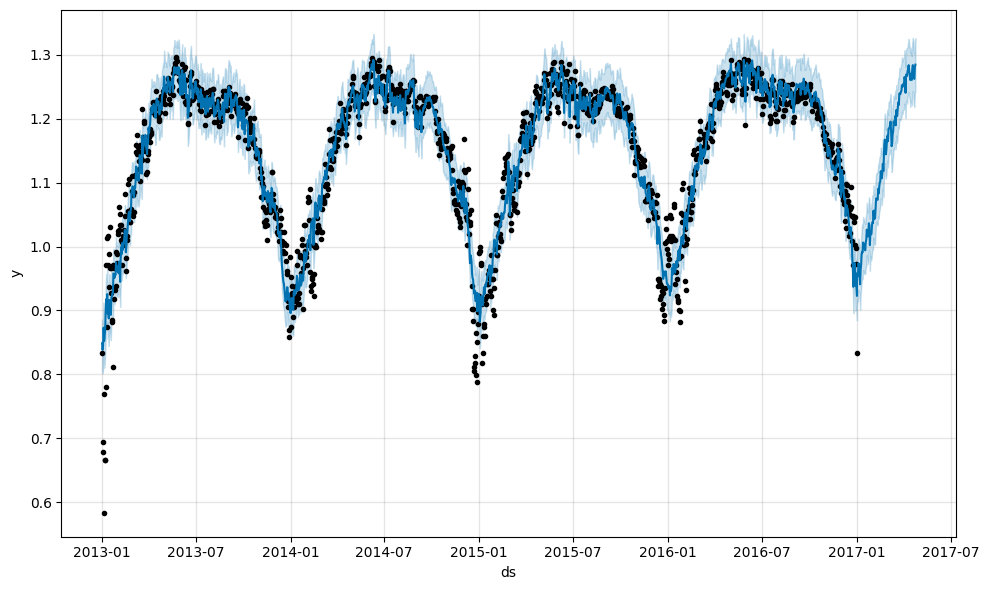

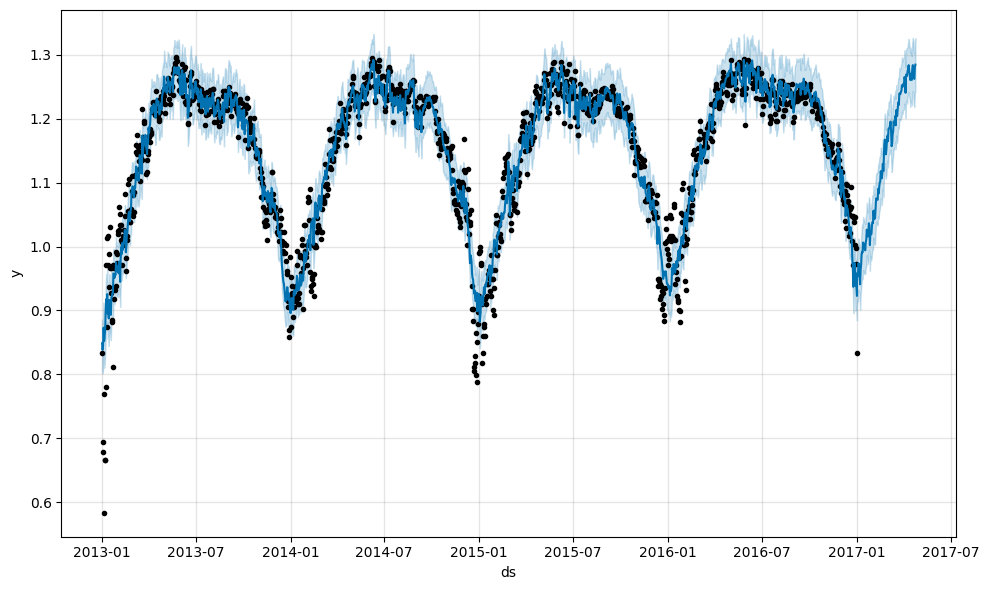

In [12]:
model_new.plot(forecast_data)

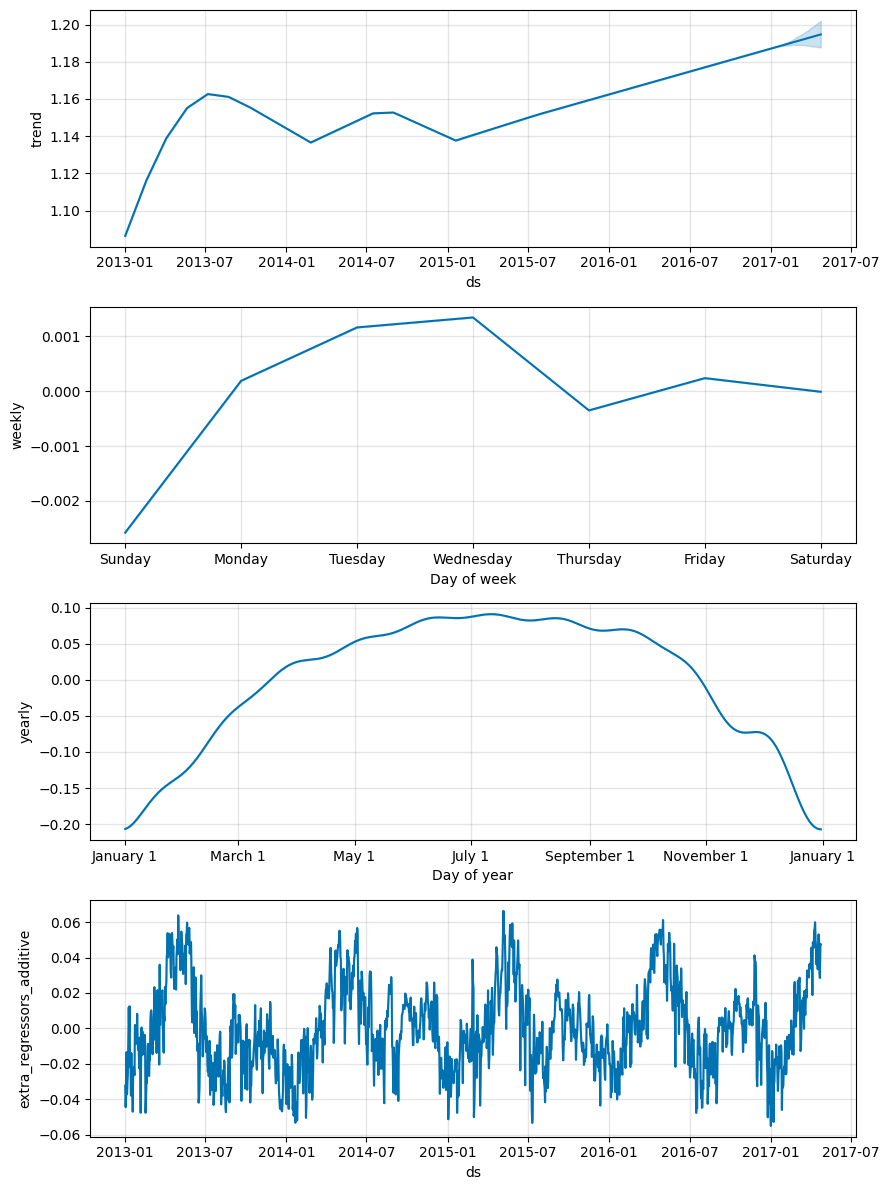

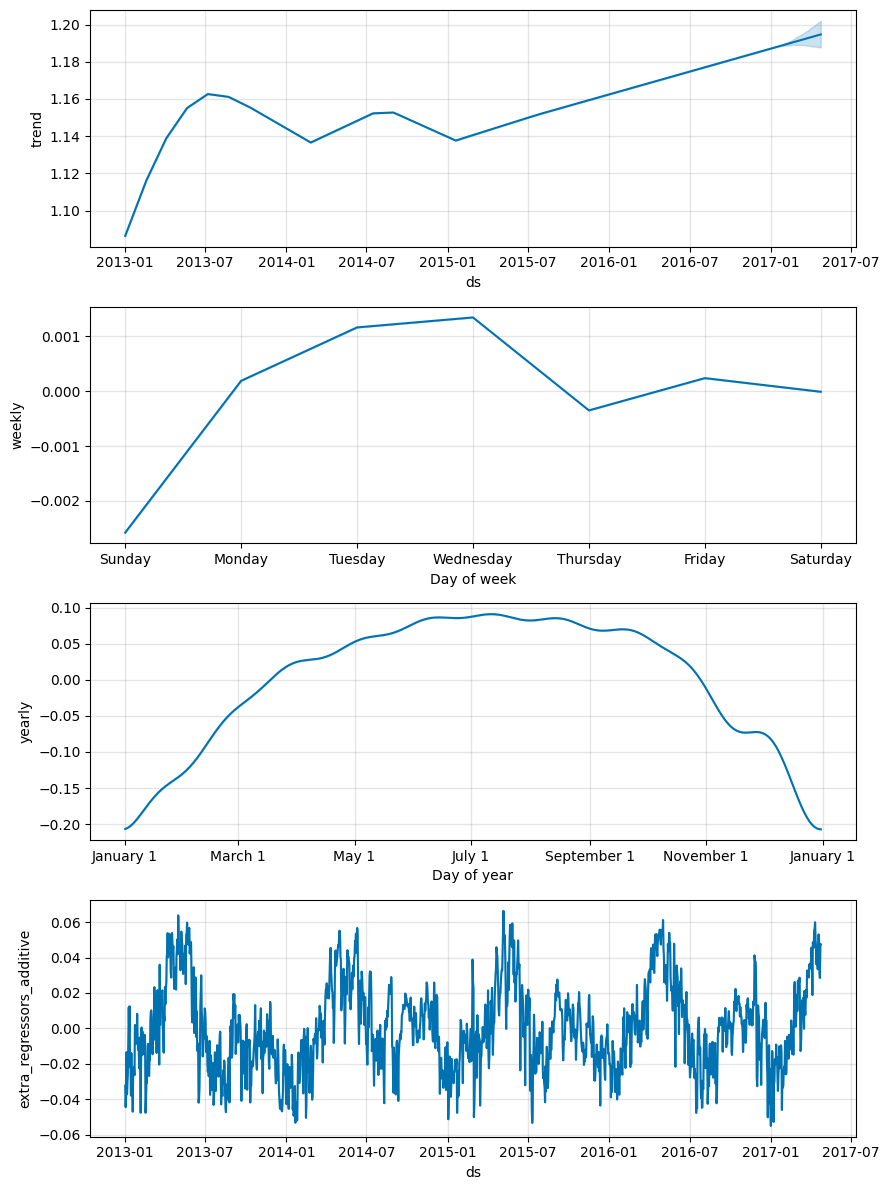

In [13]:
model_new.plot_components(forecast_data)

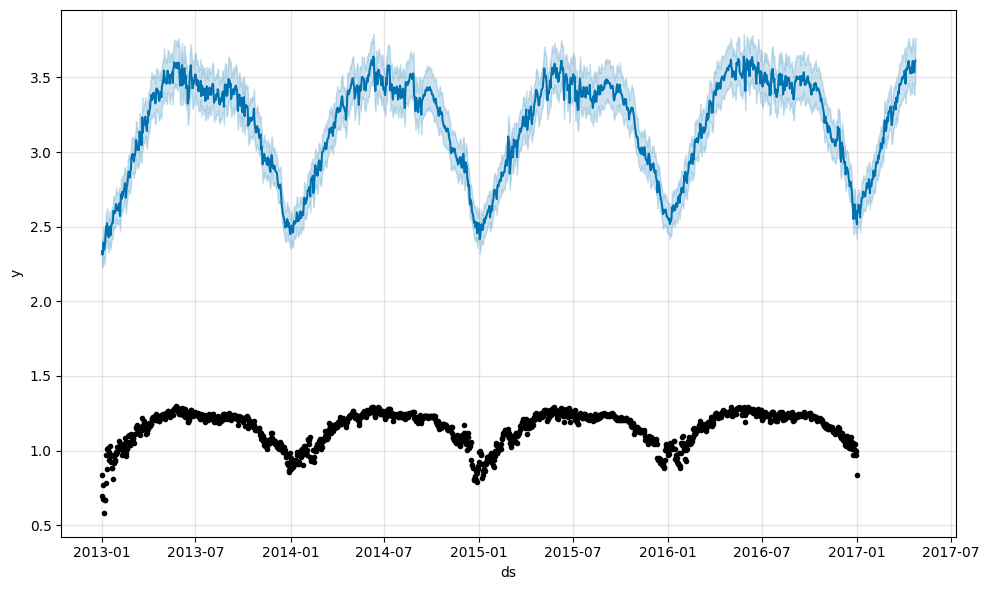

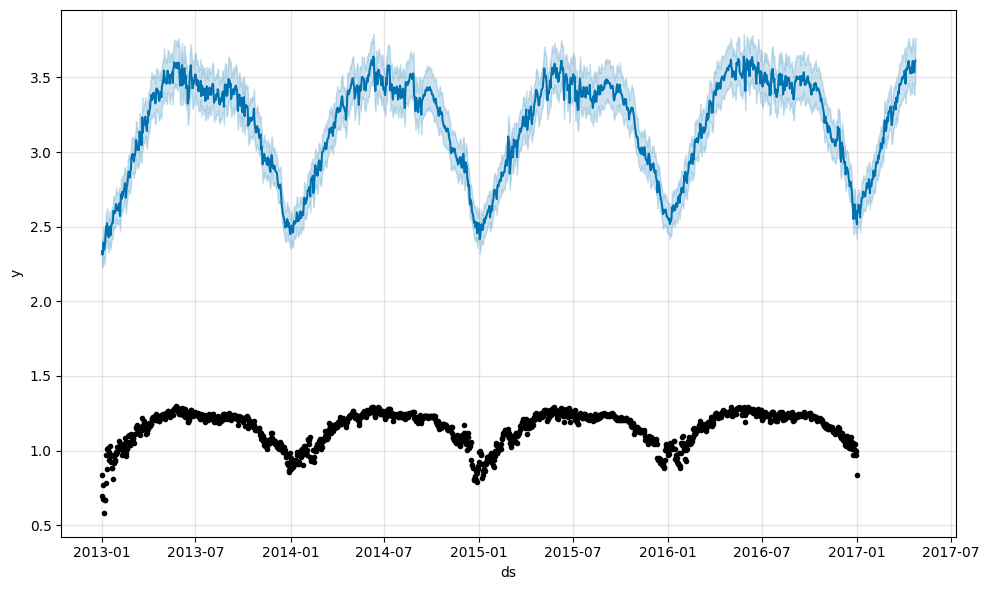

In [14]:
forecast_data_orig = forecast_data # make sure we save the original forecast data
forecast_data_orig['yhat'] = np.exp(forecast_data_orig['yhat'])
forecast_data_orig['yhat_lower'] = np.exp(forecast_data_orig['yhat_lower'])
forecast_data_orig['yhat_upper'] = np.exp(forecast_data_orig['yhat_upper'])

model_new.plot(forecast_data_orig)

In [15]:
df_train['y_log']=df_train['y'] #copy the log-transformed data to another column
df_train['y']=df_train['y_orig']

In [16]:
final_df = pd.DataFrame(forecast_data_orig)
import plotly.graph_objs as go
import plotly.offline as py
#Plot predicted and actual line graph with X=dates, Y=Outbound
actual_chart = go.Scatter(y=df_train["y_orig"], name= 'Actual')
predict_chart = go.Scatter(y=final_df["yhat"], name= 'Predicted')
predict_chart_upper = go.Scatter(y=final_df["yhat_upper"], name= 'Predicted Upper')
predict_chart_lower = go.Scatter(y=final_df["yhat_lower"], name= 'Predicted Lower')
py.plot([actual_chart, predict_chart, predict_chart_upper, predict_chart_lower])

'temp-plot.html'